# Mid-semester assignment Part 1 - Basics of deep learning
Hello dear students,<br> this is the template notebook. Please copy it into your drive and open as Google Colab nootebook".

---
<br>

### Name and ID:
Student 1: shir zohar- 323856542
<br>
Student 2:sivan zagdon - 213002918

## Sign Language Digits With NumPy
Sign Language Digits dataset contains 5,000 grayscale images in 10 categories. The images show individual articles of hand sign at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://www.researchgate.net/publication/344389112/figure/fig8/AS:941467451260937@1601474740275/Sample-images-from-ASL-with-digits-dataset.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  
</table>





The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of numbers ranging from '0' to '9'. These correspond to the *class* of hand sign digit the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Hand Sign Zero</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Hand Sign One</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Hand Sign Two</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Hand Sign Three</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Hand Sign Four</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Hand Sign Five</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Hand Sign Six</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Hand Sign Seven</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Hand Sign Eight</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Hand Sign Nine</td>
  </tr>
</table>

<br>

# Goodluck!

#Neural Network in plain NumPy

## Import Libraries

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import classification_report, confusion_matrix

## Dwonload Dataset

In [ ]:
%%capture
!pip install ipython-autotime
!pip install -U --no-cache-dir gdown --pre
!gdown --id 1-0fhqH8tXKPb60C_b4aUHT7f-J4O6Ezq
%load_ext autotime

time: 588 µs (started: 2024-12-23 20:22:22 +00:00)


Loading the dataset as NumPy arrays:

* The `dataset` file is a NumPy array containing the image pixles. As you can see, it includes 5,000 rows for each image and 784 columns for each pixel in the image (28x28).
* The `labels` file is a NumPy array containing the images labels. As you can see, it includes 5,000 rows for each image corresponding to the dataset.

In [ ]:
loaded_data = np.load('/content/dataset_labels.npz')
X, y = loaded_data['dataset'], loaded_data['labels']
print(f'Dataset shape: {X.shape}\nLabels shape: {y.shape}')

Dataset shape: (5000, 784)
Labels shape: (5000,)
time: 105 ms (started: 2024-12-23 20:22:29 +00:00)


## Data preprocessing (10%)

### Feature scaling

In [ ]:
examples = y.shape[0]
y1 = y.reshape(1, examples)
X1 = X / 255
X1 = X1.T
print(X1.shape)

(784, 5000)
time: 74.8 ms (started: 2024-12-23 20:22:32 +00:00)


# Normalize and reshape the dataset:
# - `y` is reshaped into a 2D array (1, number of examples) for consistency.
# - The input data `X` is normalized by dividing each pixel value by 255 (scaling it to the range 0-1).
# - The input data `X` is then transposed so that each column represents a single flattened image (28x28 = 784 pixels per image).
# - Finally, the shape of the processed input data is printed to confirm the transformation.



* Select two classes

In [ ]:
unique, counts = np.unique(y, return_counts=True)
class_counts = dict(zip(unique, counts))
print("Class counts:", class_counts)

selected_classes = [4, 5]
mask = np.isin(y.astype(int), selected_classes)
X_selected = X1[:, mask]
y_selected = y[mask].astype(int)
y_binary = np.where(y_selected == selected_classes[1], 1, 0)

print(f"Selected classes shape: {X_selected.shape}")
print(f"Binary labels shape: {y_binary.shape}")


Class counts: {'0': 500, '1': 500, '2': 500, '3': 500, '4': 500, '5': 500, '6': 500, '7': 500, '8': 500, '9': 500}
Selected classes shape: (784, 1000)
Binary labels shape: (1000,)
time: 28.7 ms (started: 2024-12-23 20:22:34 +00:00)


# This code filters the dataset to include only two specific classes (4 and 5).
# It maps the selected class labels to binary values (4 → 0, 5 → 1)
# for use in binary classification. It also prints the number of examples
# in each class and the shapes of the filtered input data and binary labels.

### Split the data into Train set and Test set

In [ ]:
from sklearn.utils import shuffle

X_selected, y_binary = shuffle(X_selected.T, y_binary.reshape(-1, 1))
X_selected = X_selected.T

train_size = int(0.8 * X_selected.shape[1])

X_train = X_selected[:, :train_size]
Y_train = y_binary[:train_size].reshape(1, -1)
X_test = X_selected[:, train_size:]
Y_test = y_binary[train_size:].reshape(1, -1)

print(f"Train set shape: {X_train.shape}, {Y_train.shape}")
print(f"Test set shape: {X_test.shape}, {Y_test.shape}")


Train set shape: (784, 800), (1, 800)
Test set shape: (784, 200), (1, 200)
time: 42 ms (started: 2024-12-23 20:22:37 +00:00)


# This code splits the dataset into a training set (80%) and a test set (20%)
# after shuffling the examples to ensure randomness. It ensures the labels
# are correctly reshaped for compatibility with the neural network, and it
# prints the shapes of the resulting training and test sets for verification.

### Test yourself

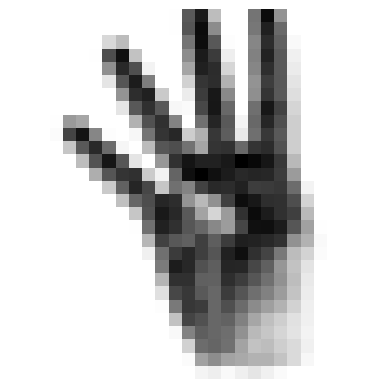

Label for the displayed image: 0
time: 145 ms (started: 2024-12-23 20:22:39 +00:00)


In [ ]:
%matplotlib inline
from numpy import random

i = random.randint(800)
plt.imshow(X_train[:, i].reshape(28, 28), cmap=matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(f"Label for the displayed image: {Y_train[0, i]}")

# This code randomly selects an example from the training set, visualizes the corresponding image,
# and prints its label. It verifies that the data preprocessing was done correctly and the images
# align with their respective labels. The displayed image is reshaped from a flat 784-pixel vector
# to a 28x28 grid and shown using a binary grayscale colormap.

**Activation functions (10%**)

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

test_input = np.array([-2, -1, 0, 1, 2])
print("Sigmoid output:", sigmoid(test_input))


Sigmoid output: [0.11920292 0.26894142 0.5        0.73105858 0.88079708]
time: 3.57 ms (started: 2024-12-23 20:22:43 +00:00)


# This code defines the sigmoid activation function, which maps any input value to a range between 0 and 1.
# The function is commonly used in neural networks for binary classification tasks.
# The sigmoid function is tested on a sample input array to demonstrate how it transforms values,
# producing outputs closer to 0 for negative inputs and closer to 1 for positive inputs.

## Loss Function (10%)

The BCE Loss function embodies the idea that the neural network should incur a substantial penalty (i.e., Loss tending toward infinity) when the predicted probability diverges significantly from the actual label of the training example. Conversely, the Loss should be zero (Loss = 0) when the predicted probability aligns perfectly with the label of the training example. In simpler terms, the BCE Loss should be zero in the following two situations:

- When the example has a positive label (${y} = 1$), the neural network should be entirely confident that the example belongs to the positive class, i.e., ($\hat{p} = 1 $).
- When the example has a negative label (${y} = 0$), the neural network should be entirely confident that the example does not belong to the positive class, i.e., ($\hat{p} = 0 $).

**It's important to note that when working with computers, extremely high or low values can sometimes be unmanageable and might even lead to system crashes. To address this, you must be aware of the range of values that cause the logarithm to yield infinity or negative infinity. Ensure you handle these edge cases within your function.**


In [ ]:
def log_loss(y_hat, y):
    epsilon = 1e-15
    y_hat = np.clip(y_hat, epsilon, 1 - epsilon)
    y = y.flatten()
    y_hat = y_hat.flatten()
    m = y.shape[0]
    loss = - (1 / m) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    return loss

y_test = np.array([[0, 1, 0, 1, 1]])
y_hat_test = np.array([[0.1, 0.9, 0.2, 0.8, 0.7]])
print("Log loss output:", log_loss(y_hat_test, y_test))



Log loss output: 0.20273661557656092
time: 3.43 ms (started: 2024-12-23 20:22:46 +00:00)


# This code defines the Binary Cross-Entropy (log-loss) function, which evaluates the average loss for a
# binary classification task. It ensures numerical stability by clipping probabilities and calculates the loss
# using true labels and predicted probabilities. The function is tested with a sample of true labels and predictions.



```
# This is formatted as code
```

## NN Hyper Parameters

In [ ]:
input_layer = X_train.shape[0]
hidden_layer = 32
output_layer = 1
learning_rate = 0.01
epochs = 50

time: 726 µs (started: 2024-12-23 20:22:50 +00:00)


# This section defines the hyperparameters for the neural network:
# - `input_layer`: Number of input features (784, corresponding to 28x28 pixel images).
# - `hidden_layer`: Number of neurons in the hidden layer (32).
# - `output_layer`: Number of output neurons (1, for binary classification).
# - `learning_rate`: The step size for updating weights during training (0.01).
# - `epochs`: The number of complete passes over the training dataset (50).

## Weight and Bias Initialization

In [ ]:
np.random.seed(42)
W1 = np.random.randn(hidden_layer, input_layer) * 0.01
b1 = np.zeros((hidden_layer, 1))
W2 = np.random.randn(output_layer, hidden_layer) * 0.01
b2 = np.zeros((output_layer, 1))

print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)

(32, 784)
(32, 1)
(1, 32)
(1, 1)
time: 6.64 ms (started: 2024-12-23 20:22:53 +00:00)


# This code initializes the weights and biases for a neural network with one hidden layer.
# The weights are initialized randomly with small values scaled by 0.01 to prevent exploding gradients,
# while the biases are initialized to zeros. The shapes of the initialized parameters are printed
# to ensure they align with the network's architecture.

## Training (30%)

In [ ]:
X = X_train
Y = Y_train
loss_list = []
epoch_list = []
num_of_examples = X.shape[1]

for i in range(epochs):
    avg_epoch_loss = 0
    for j in range(num_of_examples):
        x_j = X[:, j].reshape(-1, 1)
        y_j = Y[:, j].reshape(-1, 1)

        Z1 = np.dot(W1, x_j) + b1
        A1 = sigmoid(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)

        loss = log_loss(A2, y_j)
        avg_epoch_loss += loss

        dZ2 = A2 - y_j
        dW2 = np.dot(dZ2, A1.T)
        db2 = np.sum(dZ2, axis=1, keepdims=True)

        dA1 = np.dot(W2.T, dZ2)
        dZ1 = dA1 * A1 * (1 - A1)
        dW1 = np.dot(dZ1, x_j.T)
        db1 = np.sum(dZ1, axis=1, keepdims=True)

        W2 = W2 - learning_rate * dW2
        b2 = b2 - learning_rate * db2
        W1 = W1 - learning_rate * dW1
        b1 = b1 - learning_rate * db1

    avg_epoch_loss = avg_epoch_loss / num_of_examples
    loss_list.append(avg_epoch_loss)
    epoch_list.append(i)
    print("Epoch", i + 1, "Loss:", avg_epoch_loss)

Epoch 1 Loss: 0.6981892865271674
Epoch 2 Loss: 0.6712642599858403
Epoch 3 Loss: 0.4970440678868487
Epoch 4 Loss: 0.25286181951491427
Epoch 5 Loss: 0.14704900802909118
Epoch 6 Loss: 0.10642198251808901
Epoch 7 Loss: 0.08616881715056308
Epoch 8 Loss: 0.07371129185690026
Epoch 9 Loss: 0.06491931478488853
Epoch 10 Loss: 0.05814503545062595
Epoch 11 Loss: 0.05262194367460551
Epoch 12 Loss: 0.047949860551500766
Epoch 13 Loss: 0.043900896883996336
Epoch 14 Loss: 0.04033634162185825
Epoch 15 Loss: 0.03716710513327556
Epoch 16 Loss: 0.034332993956760455
Epoch 17 Loss: 0.03179083820370965
Epoch 18 Loss: 0.029507274793811072
Epoch 19 Loss: 0.02745438429765131
Epoch 20 Loss: 0.025607295331559095
Epoch 21 Loss: 0.0239431367107402
Epoch 22 Loss: 0.022440788943758814
Epoch 23 Loss: 0.02108098373437299
Epoch 24 Loss: 0.019846454584552444
Epoch 25 Loss: 0.018721997677848896
Epoch 26 Loss: 0.017694412551694638
Epoch 27 Loss: 0.01675234765763846
Epoch 28 Loss: 0.015886091794894187
Epoch 29 Loss: 0.015087

# This code implements the training loop for a neural network using batch gradient descent.
# Detailed steps are as follows:

# 1. **Initialization**:
#    - The training dataset (`X_train` and `Y_train`) is prepared.
#    - Lists `loss_list` and `epoch_list` store the average loss for each epoch and the epoch number.

# 2. **Training Over Epochs**:
#    - For each epoch, all training examples are processed individually to update weights and biases.

# 3. **Forward Propagation**:
#    - Compute the linear combination (`Z1`) and apply the sigmoid activation (`A1`) for the hidden layer.
#    - Compute the linear combination (`Z2`) and apply the sigmoid activation (`A2`) for the output layer.

# 4. **Loss Calculation**:
#    - Use the binary cross-entropy function (`log_loss`) to compute the difference between the predicted probabilities (`A2`) and the true labels (`Y`).

# 5. **Backpropagation**:
#    - Gradients are calculated for the weights (`dW1`, `dW2`) and biases (`db1`, `db2`) using the chain rule.
#    - Gradients propagate from the output layer back to the hidden layer.

# 6. **Parameter Updates**:
#    - The weights (`W1`, `W2`) and biases (`b1`, `b2`) are updated using gradient descent with the learning rate.

# 7. **Epoch Summary**:
#    - The average loss for the epoch is computed and added to `loss_list`.
#    - The epoch number is logged in `epoch_list`.

# This iterative process trains the neural network by minimizing the loss function over several epochs,
# improving its ability to predict labels for the given data.

### Loss Visualization

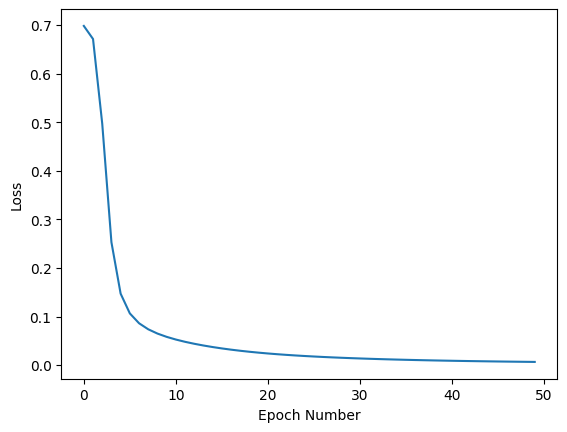

time: 348 ms (started: 2024-12-23 20:23:51 +00:00)


In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss")
plt.plot(epoch_list, loss_list)

# This code visualizes the training process by plotting the average loss against the epoch number.
# - The x-axis represents the number of epochs (iterations over the training dataset).
# - The y-axis represents the average loss calculated for each epoch.
# - The curve shows how the loss decreases as training progresses, indicating the model's learning efficiency.
# This plot helps evaluate whether the model is converging (loss decreases over time)
# or overfitting/underfitting (loss stabilizes too early or oscillates).

## Results

### Test your performance (20%)

In [ ]:
X = X_test
Y = Y_test

Z1 = np.dot(W1, X) + b1
A1 = sigmoid(Z1)
Z2 = np.dot(W2, A1) + b2
A2 = sigmoid(Z2)

predictions = np.zeros((1, Y.shape[1]))
labels = np.zeros((1, Y.shape[1]))

for i in range(Y.shape[1]):
    if A2[0, i] > 0.5:
        predictions[0, i] = 1
    labels[0, i] = Y[0, i]

from sklearn.metrics import confusion_matrix, accuracy_score

conf_matrix = confusion_matrix(labels.flatten(), predictions.flatten())
accuracy = accuracy_score(labels.flatten(), predictions.flatten())

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[101   2]
 [  3  94]]
Accuracy: 0.975
time: 11.7 ms (started: 2024-12-23 20:23:55 +00:00)


# This code evaluates the performance of the trained neural network on the test dataset.
# It performs forward propagation to compute predicted probabilities and converts these probabilities
# into binary classifications (0 or 1) based on a threshold of 0.5.
# The true labels and predictions are compared to compute the confusion matrix,
# which provides detailed classification results, and the overall accuracy score is calculated
# to measure the model's effectiveness in classifying the test data.

### Visualize the results

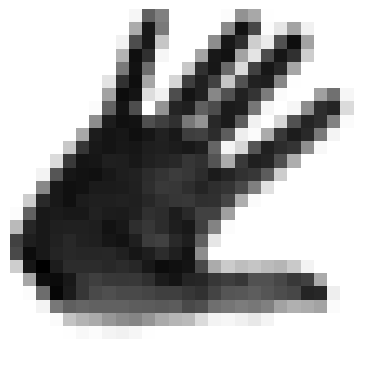

Real Label: 1, Predicted Label: 1, Predicted Probability: 0.9996


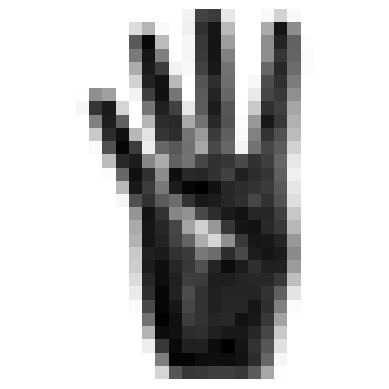

Real Label: 0, Predicted Label: 0, Predicted Probability: 0.0001


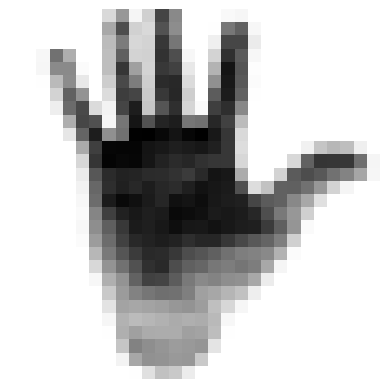

Real Label: 1, Predicted Label: 1, Predicted Probability: 0.9787


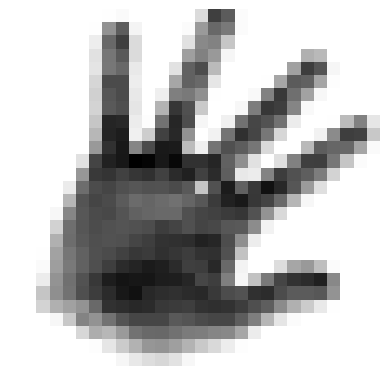

Real Label: 1, Predicted Label: 1, Predicted Probability: 0.9793


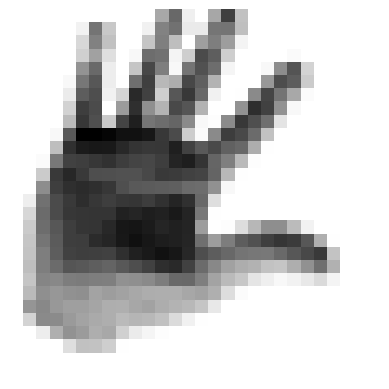

Real Label: 1, Predicted Label: 1, Predicted Probability: 0.9996


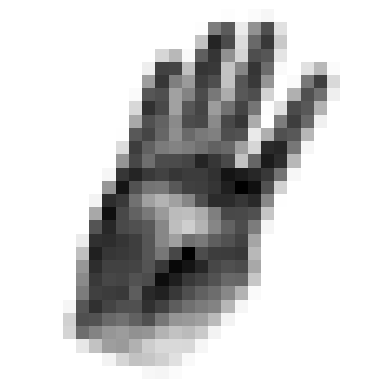

Real Label: 0, Predicted Label: 0, Predicted Probability: 0.0004


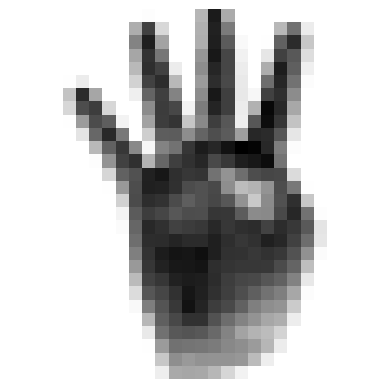

Real Label: 0, Predicted Label: 0, Predicted Probability: 0.0086


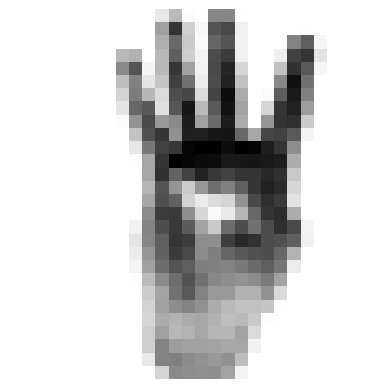

Real Label: 0, Predicted Label: 0, Predicted Probability: 0.0000


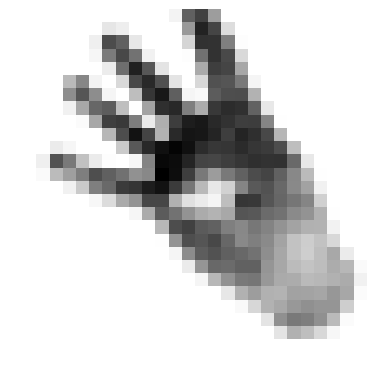

Real Label: 0, Predicted Label: 0, Predicted Probability: 0.0004


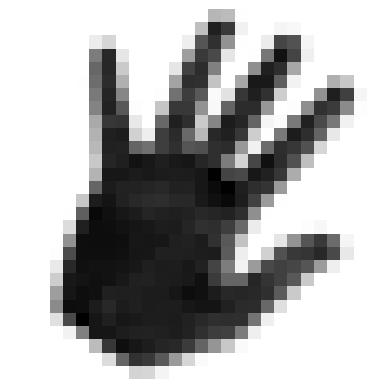

Real Label: 1, Predicted Label: 1, Predicted Probability: 0.9975
time: 934 ms (started: 2024-12-23 20:24:37 +00:00)


In [ ]:
%matplotlib inline
from numpy import random

num_examples_to_show = min(10, X_test.shape[1])

for example in range(num_examples_to_show):
    i = random.randint(X_test.shape[1])

    plt.imshow(X_test[:, i].reshape(28, 28), cmap=matplotlib.cm.binary)
    plt.axis("off")
    plt.show()

    x_example = X_test[:, i].reshape(-1, 1)
    Z1 = np.dot(W1, x_example) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    Yout = A2[0, 0]
    predicted_label = 1 if Yout > 0.5 else 0
    real_label = Y_test[0, i]

    print(f"Real Label: {real_label}, Predicted Label: {predicted_label}, Predicted Probability: {Yout:.4f}")


# This code visualizes the results of the neural network on 10 randomly selected test examples.
# It displays each test image, performs forward propagation to compute the predicted probabilities,
# and determines the predicted label based on a threshold of 0.5. The real label, predicted label,
# and predicted probability are displayed for each example, allowing a direct comparison of the
# model's predictions with the ground truth.